# Film Industry Analysis for New Studio Strategy

## Introduction
As major companies increasingly invest in original video content, the entertainment landscape is rapidly evolving. Our company has decided to enter the film production space by launching a new movie studio. However, with little to no prior experience in filmmaking, it is crucial that we rely on data-driven insights to make informed strategic decisions.
This notebook aims to explore current trends in the film industry using both box office performance data and audience ratings. By analyzing what kinds of films are performing best financially and critically, we can provide clear, evidence-based recommendations on the types of films our studio should prioritize.

## 1. Business Understanding

In [1]:
import pandas as pd
import sqlite3

print('Finished Importing Succesfully')

Finished Importing Succesfully


## 2. Data Understanding
### 2.1 Data Source
The data used in this project comes from two main sources:

1) **Box Office Mojo (bom.movie_gross.csv)**
This is a compressed CSV file containing box office performance data for a wide range of films. It includes both domestic and international gross earnings by year and studio.

2) **IMDb SQLite Database (im.db.zip)**
This is a zipped SQLite database that contains metadata and user rating information for movies. The relevant tables, `movie_basics` and `movie_ratings`, were merged to support deeper insights.

### Reasons why this Data is sufficient for Analysis
These data sources are appropriate for analyzing the business problem because they combine **financial performance metrics** with **audience and film metadata**. This allows us to identify trends in what types of films are both commercially successful and well-received by viewers—critical insights for a company looking to make informed decisions about the kinds of films their new studio should produce.



### 2.2 Initial Data Exploration
In this section, we import our data from the various sources into our workspace for exploration of it's initial properties

In [2]:
# First, we connect to the 'ím.db' database using SQLite
conn = sqlite3.connect('Data_Folder/im.db/im.db')

##### 1. Overview of 'movie _ratings'

In [4]:
# Let's query the table from the database and store it in a dataframe
query1 = """
    SELECT *
    FROM movie_ratings
"""
df_1 = pd.read_sql_query(query1, conn)

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_1.shape)
print('\nFirst 5 rows:')
display(df_1.head())
print('\nOverall Information:')
df_1.info()
print('\nSummary Description:')
display(df_1.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_1.isnull().sum()


Shape of the Dataset:


(73856, 3)


First 5 rows:


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB

Summary Description:


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06



Missing Values in Each Column:


movie_id         0
averagerating    0
numvotes         0
dtype: int64

##### 2. Overview of 'movie _basics'

In [6]:
# Let's query the table from the database and store it in a dataframe
query2 = """
    SELECT *
    FROM movie_basics
"""
df_2 = pd.read_sql_query(query2, conn)

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_2.shape)
print('\nFirst 5 rows:')
display(df_2.head())
print('\nOverall Information:')
df_2.info()
print('\nSummary Description:')
display(df_2.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_2.isnull().sum()


Shape of the Dataset:


(146144, 6)


First 5 rows:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB

Summary Description:


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000



Missing Values in Each Column:


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

##### 3. Overview of 'Data_Folder/bom.movie_gross.csv'

In [8]:
# Let's load the csv file into a pandas dataframe
df_3 = pd.read_csv('Data_Folder/bom.movie_gross.csv')

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_3.shape)
print('\nFirst 5 rows:')
display(df_3.head())
print('\nOverall Information:')
df_3.info()
print('\nSummary Description:')
display(df_3.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_3.isnull().sum()


Shape of the Dataset:


(3387, 5)


First 5 rows:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

Summary Description:


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000



Missing Values in Each Column:


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

#### 4. Overview of merged 'movie_ratings' and 'movie_basics'
The 2 tables from the 'im.db' database can be joined on the 'movie_id' column. However, we lose half the records from the 'movie basics' table by joining.Therefore, we will still have to perform seperate analysis on it even after analysing the merged table to preserve the richness of the data.

In [9]:
# Let's perform an inner join on the 2 tables
df_merged = pd.merge(df_1, df_2, on = 'movie_id', how = 'inner')

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_merged.shape)
print('\nFirst 5 rows:')
display(df_merged.head())
print('\nOverall Information:')
df_merged.info()
print('\nSummary Description:')
display(df_merged.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_merged.isnull().sum()


Shape of the Dataset:


(73856, 8)


First 5 rows:


,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB

Summary Description:


,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000



Missing Values in Each Column:


movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

### 2.3 Feature Understanding and Documentation
To support the analysis of film performance and guide our studio’s content strategy, we use features from two datasets: `bom.movie_gross.csv.gz` (Box Office Mojo) and a merged table from `movie_basics` and `movie_ratings` in `im.db` (IMDb metadata and ratings). Below is a breakdown of the features in each dataset.

#### 1. `bom.movie_gross.csv.gz`
This dataset provides financial performance data for films.
- **Identification :**
    - *title*: The name of the film (string)
- **Production :**
    - *studio*: The production or distribution studio responsible for the film (string).
- **Finanicial Metrics :**
    - *domestic_gross*: Total box office revenue earned in the domestic (U.S.) market
    - *foreign_gross*: Total box office revenue earned in international markets *(integer or float)*.

#### 2. IMDb Merged Table: `movie_basic` + `movie_ratings`
This dataset provides financial performance data for films.
- **Identification :**
    - *movie_id*: A unique identifier for each film(string)
- **Titles :**
    - *primary_title* : The title most commonly used(string).
    - *original_title* : The title most commonly used(string).
- **Time :**
    - *start_year*: The year the film was first released
- **Content Characteristics :**
    - *runtime_minutes* : The duration of the film in minutes
    - *genres* : The genre or genres associated with the film.
- **Audience Feedback :**
    - *averagerating* : The average IMDb user rating for the film
    - *numvotes* : The total number of IMDb users who rated the film

These features provide a holistic view of each film by combining:
- **Box office success** (via revenue and studio info),
- **Descriptive and categorical characteristics** (like genre and runtime),
- **Audience sentiment** (via ratings and vote counts), and
- **Temporal context** (release year).

### 2.4 Feature Selection

## 3. Data Preparation

Data Cleaning and Preprocessing.

We will focus on data cleaning and preprocessing of our data in this section. This will ensure it is ready for data analysis. This involves handling of duplicates and missing values, 

### 

3.1 Cleaning and Preparing the "bom.movie_gross.csv"

In [ ]:
df = pd.read_csv('Data_Folder/bom.movie_gross.csv')

#checking for duplicate rows
duplicate_bool = df.duplicated()
num_duplicates = duplicate_bool.sum()
print(f'\nNumber of duplicate rows: {num_duplicates}')

#display duplicate rows for inspection
if num_duplicates > 0:
    print('\nDuplicate Rows:')
    display(df[duplicate_bool])
else:
    print('\nNo duplicate rows found.')


#Display data types of each column
print('\nData Types of Each Column:')
print(df.dtypes)
#check if any columns have mixed data types
for col in df.columns:
    unique_types = df[col].map(type).unique()
    if len(unique_types) > 1:
        print(f"Warning: Column '{col}' has mixed data types: {unique_types}")


#Checking for missing values
missing_counts = df.isnull().sum()
#Show columns with missing values
missing_columns = missing_counts[missing_counts > 0]
if not missing_columns.empty:
    print('\nColumns with Missing Values and their counts:')
    print(missing_columns)
else:
    print('\nNo missing values found in the dataset.')



Number of duplicate rows: 0

No duplicate rows found.

Data Types of Each Column:
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

Columns with Missing Values and their counts:
studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64


3.2 Converitng non-string values in 'studio' to "NaN"

In [21]:
#importing necessary library
import numpy as np

#converitng non-string values in studio column to string
df['studio'] = df['studio'].apply(lambda x: x if isinstance(x, str) else np.nan)

print("unique types in 'studio' after cleaning:")
print(df['studio'].map(type).unique())

#show all non_string values in the 'studio' column
non_strings = df[df['studio'].map(type) != str]
print(non_strings['studio'].unique())




unique types in 'studio' after cleaning:
[<class 'str'> <class 'float'>]
[nan]


3.3 Converting 'foreign_gross' data to float.

In [23]:
#first, remove commas(if any)
df['foreign_gross'] = df['foreign_gross'].replace(',', '', regex=True)
#then convert non-numeric values to NaN
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

#check the new data type
print(df['foreign_gross'].dtype)

float64


3.4 Visualizing missing values with seaborn and matplotlib.

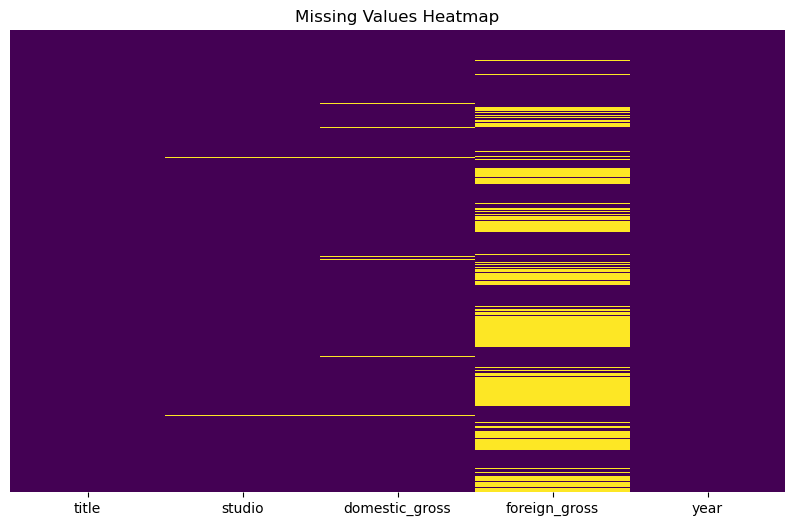

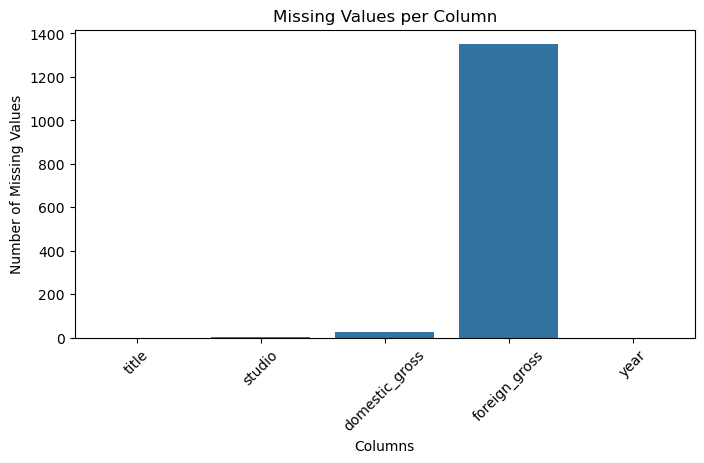

In [25]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#create a boolean dataframe for missing values
missing = df.isnull()

#plotting a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#bar plot of missing values count per column
missing_counts = df.isnull().sum()
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=45)
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

3.5 Handling missing data.

In [26]:
#handling missing values in each column
df['studio'] = df['studio'].fillna('Unknown')  # Fill missing studio names with 'Unknown' cause it only has 5 missing values
df['domestic_gross'] = df['domestic_gross'].fillna(0)  # missing values can mean the movie had no domestic gross recorded
df['foreign_gross'] = df['foreign_gross'].fillna(0)  # missing values can mean the movie had no foreign gross recorded

#To confirm no missing values remain.
print("missing values after cleaning:")
print(df[['studio', 'domestic_gross', 'foreign_gross']].isnull().sum())

#saving the cleaned dataframe to a new csv file
df.to_csv('Data_Folder/cleaned_bom_movie_gross.csv', index=False)


missing values after cleaning:
studio            0
domestic_gross    0
foreign_gross     0
dtype: int64


3.6 Data cleaning and preparation for 'im.db' file

3.6.1 Movie_ratings.

In [ ]:
#connecting to the database
conn = sqlite3.connect('Data_Folder/im.db/im.db')
#load movie_ratings table from the database
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
# show initialshape of the table
print("initial shape of movie_ratings:",movie_ratings.shape)

# Check for duplicates in the movie_ratings table
duplicates = movie_ratings[movie_ratings.duplicated()]
print(f"nNumber of duplicate rows:{duplicates.shape[0]}")
print("sample duplicate rows:")
print(duplicates.head())

#Check for missing values
missing_values = movie_ratings.isnull().sum()
print("Missing values per column:")
print(missing_values)

#percentage of missing values
missing_percent = (movie_ratings.isnull().sum() / len(movie_ratings)) * 100
print("\npercentage of missing values per column:")
print(missing_percent)

: 